# Support Vector Machines
The Data has already been processed earlier. 
So I will use what I have.

## A First Pass

In [33]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import os
from sklearn.utils import shuffle
import matplotlib.pyplot as plt 
from openpyxl import Workbook
pd.options.display.float_format = '{:.2f}'.format

In [2]:
os.getcwd()
os.chdir('c:\\Users\\amcfa\\gitfiles\\Projects\\MastersWork\\shorter_ML_Projects\\Machine-Learning-_-Prediction')
X1=pd.read_csv(os.getcwd()+ '/X1.csv')
X2=pd.read_csv(os.getcwd()+ '/X2.csv')
from sklearn.utils import shuffle
X1 = shuffle(X1)
X2=shuffle(X2)
y_train=X1['Data_x'].reset_index(drop=True) # Separating all of the data
y_test=X2['Data_x'].reset_index(drop=True)
X_train = X1.iloc[:,3: ]
X_test = X2.iloc[:,3: ]

In [59]:
X_train.head()

,GERCB,HLRCV,LORCB,NGRCV,PERCV,PQRCB,PQRCP,PQRCV,SORCB,SOTXB,TERCB,TERCV,TNRCB,TNRSB,WDRCV,StateCode,Year1
2075,265.00,135.80,220440.00,423.50,631.00,0.00,0.00,0.00,19.00,19.00,362504.00,3118.10,142064.00,139457.00,10.30,40,35
1335,0.00,13.00,24084.00,50.00,83.20,0.00,0.00,0.00,0.00,0.00,68676.00,167.60,44592.00,39291.00,1.80,26,9
1134,0.00,126.80,171647.00,1718.60,2212.40,0.00,0.00,0.00,0.00,0.00,711880.00,3609.60,540233.00,504236.00,28.30,22,12
2293,96.00,66.70,64259.00,593.80,683.70,3054.00,795.00,66.70,3283.00,4150.00,187847.00,1696.70,123588.00,117743.00,20.50,44,49
2407,0.00,18.10,200369.00,158.00,340.50,0.00,0.00,0.00,0.00,0.00,348104.00,804.30,147735.00,141036.00,12.60,47,10


Created a pipeline here.

In [60]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
y_pred=regr.fit(X_train, y_train).predict(X_test)

In [62]:
y_true =y_test
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()
results_trial1=results_trial1.rename(columns={'Data_x':'true',0:'predicted'})
results_trial1['how_off']= ((results_trial1['true']-results_trial1['predicted'])/results_trial1['true'])*100
results_trial1.head(1)


,true,predicted,how_off
0,616.50,977.92,-58.63


The results were not ideal. 


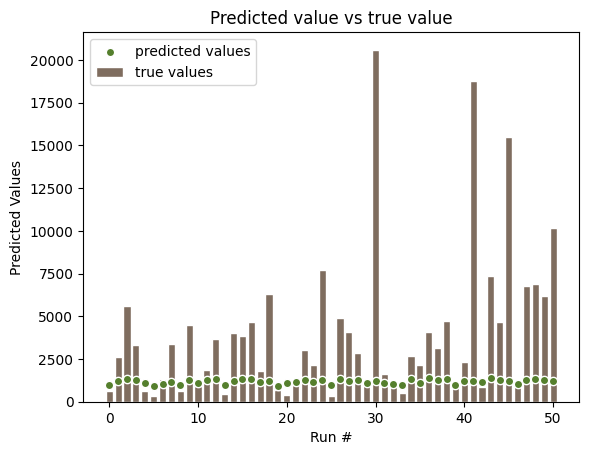

In [63]:
r1 = np.arange(len(results_trial1['true']))

plt.bar(r1, results_trial1['true'], color='#7f6d5f', edgecolor='white', label='true values')
plt.scatter(r1, results_trial1['predicted'], color='#557f2d', edgecolor='white', label='predicted values')
plt.xlabel('Run #')
plt.ylabel('Predicted Values')
plt.title('Predicted value vs true value')

plt.legend()

## Parameter Optimazation

### Varying C
Gridsearch is extremely slow at the moment. So I will do this the old fashioned way. \
First vary the regularization parameter.

In [36]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score


m=20
abc=[]
defg=[]
for i in range(1,m):
	regr = make_pipeline(StandardScaler(), SVR(C=i, epsilon=0.2))
	y_pred=regr.fit(X_train, y_train).predict(X_test)
	abc.append((mean_absolute_error(y_true, y_pred),
            mean_squared_error(y_true, y_pred),explained_variance_score(y_true, y_pred),r2_score(y_true, y_pred)))
	defg.append(y_true)
	pqr=pd.DataFrame(abc).T

In [39]:
pqr=pqr.rename(index={0:'Mean Absolute error',1:'Mean Squared error',2:'explained variance',3:'r_2 score'})

### Results of just chaning the reuglarization parameter.
The results below were not ideal. The Mean absoulte error was 2000 and the r_2 was incredibly low. 

In [40]:
pqr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Mean Absolute error,2957.51,2792.97,2668.64,2572.99,2492.08,2429.53,2375.58,2321.06,2278.06,2235.52,2200.26,2170.31,2141.14,2112.25,2084.62,2055.50,2032.23,2011.19,1991.73
Mean Squared error,25384127.52,23871450.82,22780424.66,21903785.80,21147071.61,20601187.44,20141386.39,19694202.68,19352235.38,19008309.65,18712479.71,18464580.07,18242558.35,18007064.25,17809060.63,17590235.98,17435750.07,17301447.61,17182899.08
explained variance,0.03,0.05,0.06,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.17,0.18,0.19,0.19,0.20,0.20
r_2 score,-0.39,-0.31,-0.25,-0.20,-0.16,-0.13,-0.10,-0.08,-0.06,-0.04,-0.02,-0.01,0.00,0.02,0.03,0.04,0.05,0.05,0.06


### Kernel Changed from RBF to linear
Changed the kernel type from `radial basis function` to `linear` and extend the range for the regularization parameter.

In [68]:
m=25
abc=[]
defg=[]
#This needs to run 3 times and in those 3 times. Needs to give results
for i in range(1,m):
	regr = make_pipeline(StandardScaler(), SVR(C=i,kernel='linear', epsilon=0.2))
	y_pred=regr.fit(X_train, y_train).predict(X_test)
	abc.append((mean_absolute_error(y_true, y_pred),
            mean_squared_error(y_true, y_pred),explained_variance_score(y_true, y_pred),r2_score(y_true, y_pred)))
	defg.append(y_true)
	pqr=pd.DataFrame(abc).T


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,807.71,647.52,555.42,477.29,423.09,372.50,335.77,300.17,268.50,236.27,...,98.01,73.16,49.17,26.34,6.56,1.48,0.91,0.61,0.50,0.43
1,2234662.17,1420285.52,1035246.76,770271.34,594246.41,464131.87,373375.22,297778.33,238012.15,184288.86,...,31005.94,17208.54,7750.25,2210.91,136.78,6.71,2.42,1.04,0.68,0.49
2,0.89,0.93,0.95,0.96,0.97,0.98,0.98,0.98,0.99,0.99,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
3,0.88,0.92,0.94,0.96,0.97,0.97,0.98,0.98,0.99,0.99,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### Results of kernel change

The best performing model in the output below has extremely low squared errors and high $R^2$ and explained variance.

In [86]:
pqr

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,807.71,647.52,555.42,477.29,423.09,372.50,335.77,300.17,268.50,236.27,...,98.01,73.16,49.17,26.34,6.56,1.48,0.91,0.61,0.50,0.43
1,2234662.17,1420285.52,1035246.76,770271.34,594246.41,464131.87,373375.22,297778.33,238012.15,184288.86,...,31005.94,17208.54,7750.25,2210.91,136.78,6.71,2.42,1.04,0.68,0.49
2,0.89,0.93,0.95,0.96,0.97,0.98,0.98,0.98,0.99,0.99,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
3,0.88,0.92,0.94,0.96,0.97,0.97,0.98,0.98,0.99,0.99,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [69]:
transpose_again= pqr.T

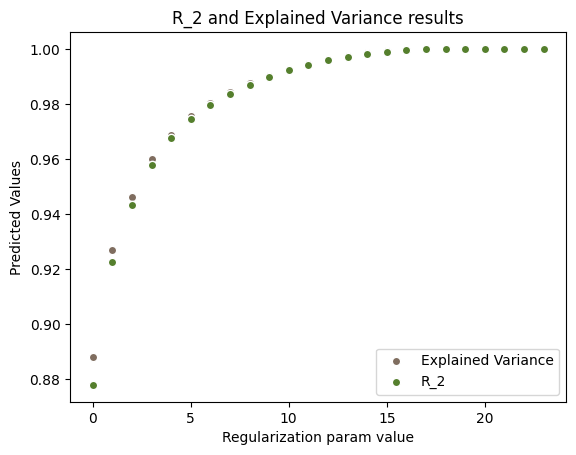

In [88]:
r1 = np.arange(len(transpose_again))

plt.scatter(r1, transpose_again[2], color='#7f6d5f', edgecolor='white', label='Explained Variance')
plt.scatter(r1, transpose_again[3], color='#557f2d', edgecolor='white', label='R_2')
plt.xlabel('Regularization param value')
plt.ylabel('Predicted Values')
plt.title('R_2 and Explained Variance results')

plt.legend()

## Testing the new parameters

Model Params:
* `C` =23.0
* `kernel` = linear

In [80]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
regr = make_pipeline(StandardScaler(), SVR(C=23.0, epsilon=0.2,kernel='linear'))
y_pred=regr.fit(X_train, y_train).predict(X_test)

In [90]:
y_true =y_test
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()
results_trial1=results_trial1.rename(columns={'Data_x':'true',0:'predicted'})
results_trial1['how_off']= ((results_trial1['true']-results_trial1['predicted'])/results_trial1['true'])*100
1-np.mean(results_trial1['how_off'])

1.0084563357808805

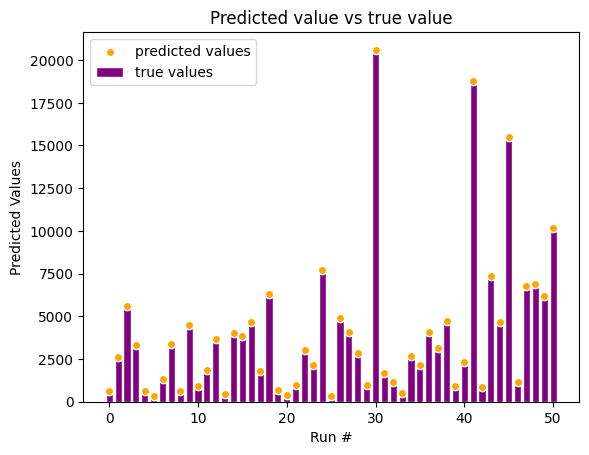

In [84]:
r1 = np.arange(len(results_trial1['true']))

plt.bar(r1, results_trial1['true'], color='purple', edgecolor='white', label='true values')
plt.scatter(r1, results_trial1['predicted'], color='orange', edgecolor='white', label='predicted values')
plt.xlabel('Run #')
plt.ylabel('Predicted Values')
plt.title('Predicted value vs true value')

plt.legend()

In [85]:
print('Mean absolute Error',mean_absolute_error(y_true, y_pred))
print('Mean squared error', mean_squared_error(y_true, y_pred))
print(('Explained variance score',explained_variance_score(y_true, y_pred)))
print(('R_2 score',r2_score(y_true, y_pred)))

Mean absolute Error 0.5021485094357804
Mean squared error 0.6832135549229309
('Explained variance score', 0.9999999633196209)
('R_2 score', 0.999999962630569)


# Results

The SVR performed very well. With a prediction accuracy of 100%.
The `MAE` was 0.5021485094357804\
The `MSE` was 0.6832135549229309\
The `Explained variance` was 0.9999999633196209\
The $ R^2 $ was 0.999999962630569